# Task-6:Part 1 Time Series Analysis 
Objective 
Analyze sales data over time and forecast future sales using statistical models. 


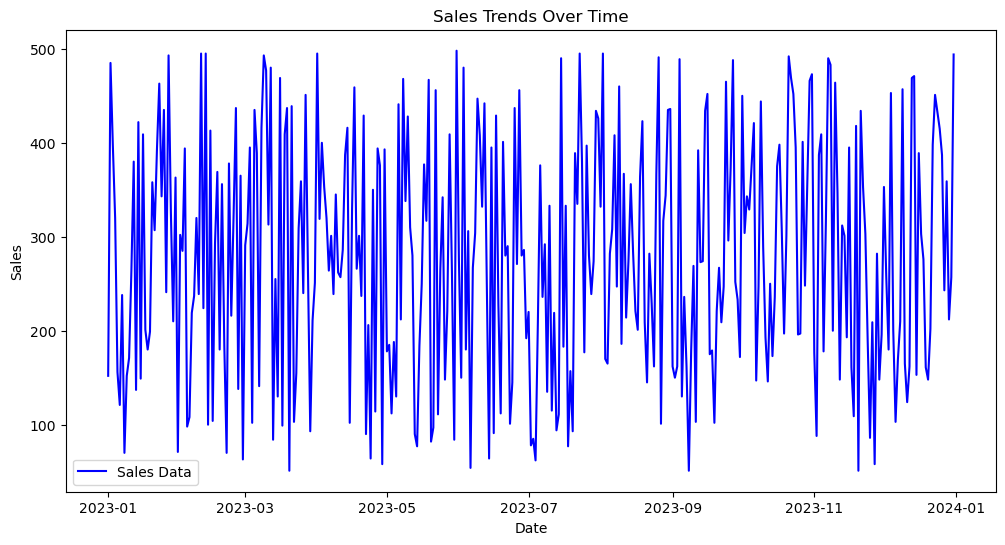

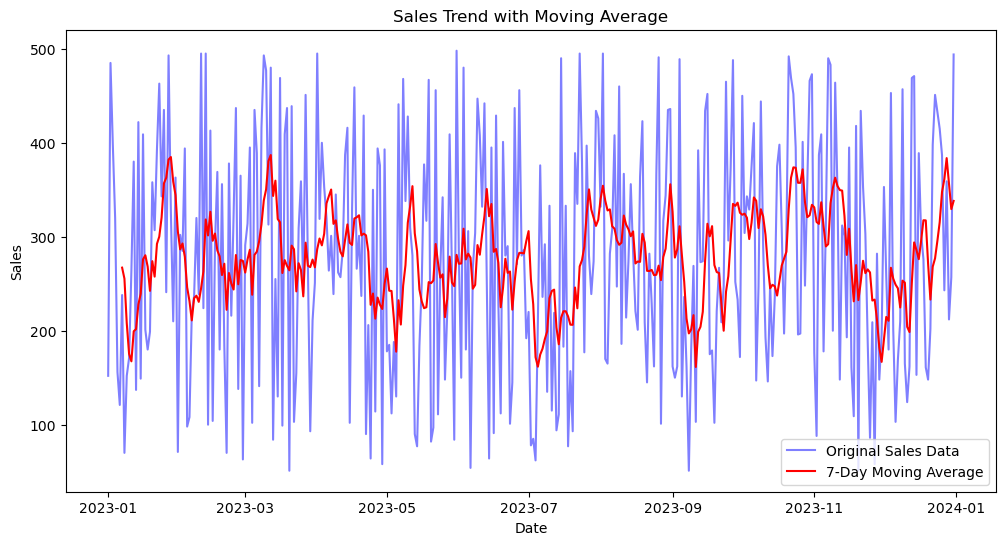

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 134.13361458429193
MAPE: 0.6028510479356332


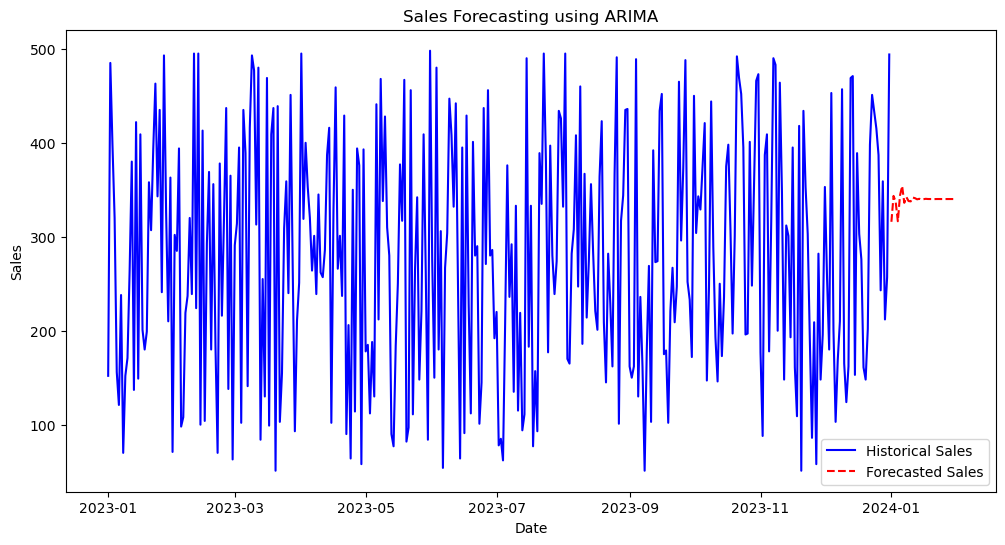

Forecasted Sales Values:
          Date  Forecasted_Sales
0  2024-01-01        315.920293
1  2024-01-02        343.481122
2  2024-01-03        337.053772
3  2024-01-04        316.520564
4  2024-01-05        343.797143
5  2024-01-06        353.939665
6  2024-01-07        336.118617
7  2024-01-08        342.182970
8  2024-01-09        337.980445
9  2024-01-10        337.657045
10 2024-01-11        341.730532
11 2024-01-12        341.039528
12 2024-01-13        339.843522
13 2024-01-14        340.411402
14 2024-01-15        339.677970
15 2024-01-16        340.010827
16 2024-01-17        340.386914
17 2024-01-18        340.184484
18 2024-01-19        340.154279
19 2024-01-20        340.159767
20 2024-01-21        340.083917
21 2024-01-22        340.158387
22 2024-01-23        340.176260
23 2024-01-24        340.152538
24 2024-01-25        340.156209
25 2024-01-26        340.148569
26 2024-01-27        340.145047
27 2024-01-28        340.155146
28 2024-01-29        340.154141
29 2024-01-30 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Step 1: Generate Random Dataset
np.random.seed(42)
date_range = pd.date_range(start='2023-01-01', periods=365, freq='D')
sales_data = np.random.randint(50, 500, size=len(date_range))

# Create DataFrame
sales_df = pd.DataFrame({'Date': date_range, 'Sales': sales_data})

# Step 2: Convert Date column to datetime format
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.set_index('Date', inplace=True)

# Step 3: Visualize Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(sales_df['Sales'], label='Sales Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trends Over Time')
plt.legend()
plt.show()

# Step 4: Apply Moving Average to observe trends
sales_df['Moving_Avg'] = sales_df['Sales'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(sales_df['Sales'], label='Original Sales Data', color='blue', alpha=0.5)
plt.plot(sales_df['Moving_Avg'], label='7-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend with Moving Average')
plt.legend()
plt.show()

# Step 5: Train ARIMA Model
model = ARIMA(sales_df['Sales'], order=(5,1,0))  # Adjust ARIMA parameters as needed
model_fit = model.fit()

# Step 6: Forecast Sales for Future Periods
forecast_steps = 30  # Forecast for 30 future days
forecast = model_fit.forecast(steps=forecast_steps)
dates = pd.date_range(sales_df.index[-1], periods=forecast_steps+1, freq='D')[1:]
forecast_df = pd.DataFrame({'Date': dates, 'Forecasted_Sales': forecast.values})

# Step 7: Validate Model Performance
rmse = np.sqrt(mean_squared_error(sales_df['Sales'][-forecast_steps:], forecast[:forecast_steps]))
mape = mean_absolute_percentage_error(sales_df['Sales'][-forecast_steps:], forecast[:forecast_steps])
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

# Step 8: Plot Forecast vs Actual Sales
plt.figure(figsize=(12, 6))
plt.plot(sales_df['Sales'], label='Historical Sales', color='blue')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Sales'], label='Forecasted Sales', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting using ARIMA')
plt.legend()
plt.show()

# Step 9: Deliverables
print("Forecasted Sales Values:\n", forecast_df)


# Project Description: Part 2 Predicting Heart Disease Using 
Logistic Regression 
Objective 
Predict whether a patient has heart disease based on key medical parameters. 


Dataset Head:
     Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                 

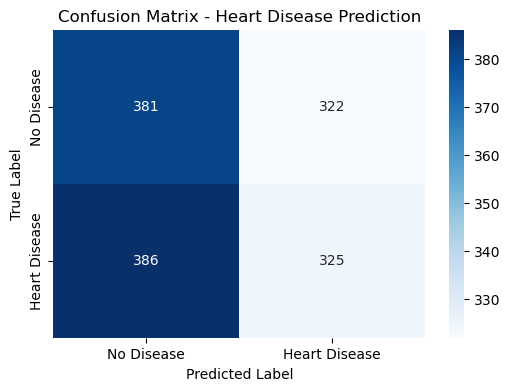

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load Dataset
heart_df = pd.read_csv('heart_disease.csv')

# Step 2: Check dataset structure and missing values
print("Dataset Head:\n", heart_df.head())
print("Available Columns:\n", heart_df.columns)
print("Missing Values:\n", heart_df.isnull().sum())

# Step 3: Handle Missing Values and Duplicates
heart_df.dropna(inplace=True)
heart_df.drop_duplicates(inplace=True)

# Step 4: Dynamically Select Feature and Target Columns
feature_columns = [col for col in heart_df.columns if col.lower() in ['age', 'cholesterol', 'blood pressure']]
target_column = [col for col in heart_df.columns if 'heart' in col.lower()]

if not target_column:
    raise KeyError("No valid target column found for heart disease prediction.")
target_column = target_column[0]

X = heart_df[feature_columns]
y = heart_df[target_column].map({'Yes': 1, 'No': 0})

# Step 5: Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 8: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Heart Disease Prediction Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Step 9: Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Heart Disease Prediction')
plt.show()
